In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data-ch20.git

fatal: destination path 'data-ch20' already exists and is not an empty directory.


In [5]:
# 학습셋의 변형을 설정하는 부분입니다.
train_datagen = ImageDataGenerator(rescale=1./255, # 주어진 이미지 크기를 설정
    horizontal_flip=True,   # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
    width_shift_range=0.1,  # 전체 크기의 15% 범위에서 좌우로 이동합니다.
    height_shift_range=0.1, # 마찬가지로 위아래로 이동합니다.
    #rotation_range=5,      # 정해진 각도만큼 회전시킵니다.
    #shear_range=0.7,       # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
    #zoom_range=[0.9, 2.2], # 확대 또는 축소시킵니다.
    #vertical_flip=True,    # 수직 대칭 이미지를 만듭니다.
    #fill_mode='nearest'    # 빈 공간을 채우는 방법입니다.
                            # nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
    ) 

In [6]:
train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',    # 학습셋이 있는 폴더의 위치입니다.
    target_size=(150,150),
    batch_size=5,
    class_mode='binary')

Found 160 images belonging to 2 classes.


In [7]:
# 테스트셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

In [8]:
test_generator = test_datagen.flow_from_directory(
    './data-ch20/test',     # 테스트셋이 있는 폴더의 위치입니다.
    target_size=(150,150),
    batch_size=5,
    class_mode='binary')

Found 120 images belonging to 2 classes.


In [9]:
# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [10]:
# 모델 실행의 옵션을 설정합니다. 
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam
(learning_rate=0.0002), metrics=['accuracy'])


In [11]:
# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [12]:
# 모델을 실행합니다.
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    validation_steps=10, 
    callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 3s 64ms/step - loss: 0.7119 - accuracy: 0.4938 - val_loss: 0.6927 - val_accuracy: 0.5200
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 0.6935 - accuracy: 0.5375 - val_loss: 0.7008 - val_accuracy: 0.3600
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6931 - accuracy: 0.4938 - val_loss: 0.6886 - val_accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6889 - accuracy: 0.5625 - val_loss: 0.6946 - val_accuracy: 0.4200
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6874 - accuracy: 0.5813 - val_loss: 0.6764 - val_accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6675 - accuracy: 0.6500 - val_loss: 0.6604 - val_accuracy: 0.6800
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.6730 - accuracy: 0.6125 - val_loss: 0.6359 - val_accuracy: 0.8200
Epoch 

In [13]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

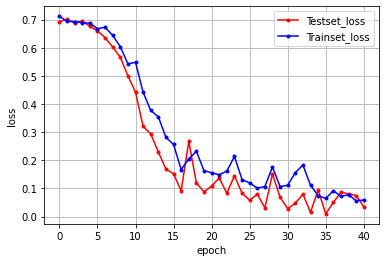

In [17]:
# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
